# Effective Index

## Effective Index of the Fundamental Mode

Effective index of the fundamental mode of a 220-nm-thick silicon-on-insulator waveguide can be accessed by using `neff` function of `effective_index` module. Note that for the default parameters below, this mode happens to be a TE mode. The function takes the following arguments:

- `wavelength`: Wavelength of the light in the waveguide, in micrometers. A list of wavelengths can also be passed. Wavelength range is from 1.2 to 1.7 micrometers; it will return 0 for wavelengths out of range.
- `width`: Width of the waveguide, in micrometers. A list of widths can also be passed. Width range is from 0.240 to 0.700 micrometers; it will return 0 for widths out of range.

In [1]:
from sipkit.effective_index import neff
import jax.numpy as jnp

neff(width=0.5, wavelength=1.55)


Array(2.44523381, dtype=float64)

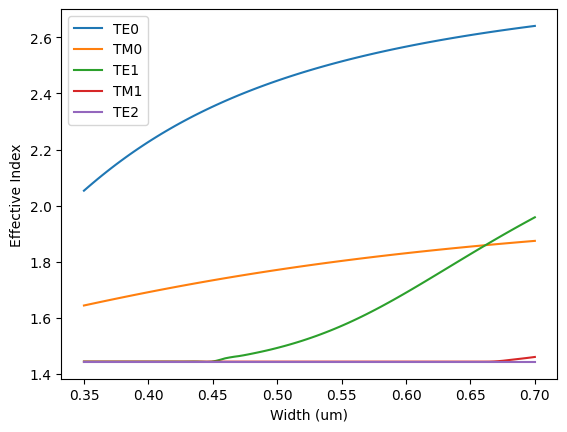

In [2]:
import matplotlib.pyplot as plt

from sipkit.effective_index import neff_te0, neff_tm0, neff_te1, neff_tm1, neff_te2

%matplotlib inline

width_range = jnp.linspace(0.35, 0.7, 100)

plt.plot(width_range, neff_te0(width_range, 1.55), label="TE0")
plt.plot(width_range, neff_tm0(width_range, 1.55), label="TM0")
plt.plot(width_range, neff_te1(width_range, 1.55), label="TE1")
plt.plot(width_range, neff_tm1(width_range, 1.55), label="TM1")
plt.plot(width_range, neff_te2(width_range, 1.55), label="TE2")
plt.legend()
plt.xlabel("Width (um)")
plt.ylabel("Effective Index")
plt.show()

**Note**: If there is no GPU/TPU available, Jax will automatically fall back to CPU backend. Using a CPU backend works well for certain tasks, but a GPU or TPU backends may work better for larger workloads with specific operations. Users are advised to test different possibilities if resources are available.


## Argument Specifications

* Scalar width, scalar wavelength

In [3]:
neff(width=0.5, wavelength=1.55)

Array(2.44523381, dtype=float64)

*  Scalar width, 1D Array wavelength


In [4]:
neff(width=0.5, wavelength=jnp.linspace(1.4, 1.5, 5))

Array([2.6138077 , 2.58583721, 2.55782222, 2.52975709, 2.50163816],      dtype=float64)

* 1D Array width, scalar wavelength

In [5]:
neff(width=jnp.linspace(0.4, 0.5, 5), wavelength=1.55)

Array([2.22706193, 2.29512748, 2.35308258, 2.40263554, 2.44523381],      dtype=float64)

* 1D Array width, 1D Array wavelength

In [6]:
neff(width=jnp.linspace(0.4, 0.5, 5), wavelength=jnp.linspace(1.4, 1.5, 5))

Array([2.43643383, 2.45969938, 2.47767491, 2.49138915, 2.50163816],      dtype=float64)

* Scalar width, 2D Array wavelength

In [7]:
neff(width=0.45, wavelength=jnp.array([[1.4, 1.5], [1.6, 1.7]]))

Array([[2.53952222, 2.41551475],
       [2.2904706 , 2.16536619]], dtype=float64)

* 2D Array width, scalar wavelength

In [8]:
neff(width=jnp.array([[0.4, 0.45], [0.5, 0.55]]), wavelength=1.55)

Array([[2.22706193, 2.35308258],
       [2.44523381, 2.51410111]], dtype=float64)

* 2D Array width, 2D Array wavelength

In [9]:
waveguide_width = jnp.array([0.5, 0.6])
wavelength = jnp.array([1.5, 1.6, 1.7])
waveguide_width, wavelength = jnp.meshgrid(waveguide_width, wavelength)
neff(waveguide_width, wavelength)

Array([[2.50163816, 2.61481455],
       [2.38861872, 2.5186588 ],
       [2.27496007, 2.42226799]], dtype=float64)

## Effective Index of Higher Order Modes

Effective Index of first 5 modes in a waveguide can be accessed by using the following functions of `effective_index` module:

- `neff_te0`: Effective index of TE0 mode. (Note that currently this is the same as `neff`, due to the waveguide width boundaries used.) 
- `neff_tm0`: Effective index of TM0 mode.
- `neff_te1`: Effective index of TE1 mode.
- `neff_tm1`: Effective index of TM0 mode.
- `neff_te2`: Effective index of TE3 mode.


In [10]:
from sipkit.effective_index import neff_te0, neff_tm0


neff_te0_list = neff_te0(width=jnp.linspace(0.4, 0.5, 5), wavelength=1.55)
neff_te0_list

Array([2.22706193, 2.29512748, 2.35308258, 2.40263554, 2.44523381],      dtype=float64)

In [11]:
neff_tm0_list = neff_tm0(width=jnp.linspace(0.4, 0.5, 5), wavelength=1.55)
neff_tm0_list

Array([1.69157614, 1.71344278, 1.73396505, 1.75313724, 1.77099004],      dtype=float64)

For the cases where the specified mode is not guided, the function will return the refractive index of silicon dioxide as the effective index at that wavelength.

In [12]:
from sipkit.effective_index import neff_te2


neff_te2_list = neff_te2(width=jnp.linspace(0.4, 0.5, 5), wavelength=1.55)
neff_te2_list


Array([1.4440023, 1.4440023, 1.4440023, 1.4440023, 1.4440023], dtype=float64)